2. Data Preparation

In [1]:
import os
from tensorflow.keras.preprocessing.image import load_img
import numpy as np

In [2]:
# Load Images
DATASET_CLEAN_PATH = os.path.join("Dataset", "Dataset Clean")

images = []
classes = []
class_names = {}

for idx, label in enumerate(os.listdir(DATASET_CLEAN_PATH)):
    for filename in os.listdir(os.path.join(DATASET_CLEAN_PATH, label)):
        image_path = os.path.join(DATASET_CLEAN_PATH, label, filename)

        # Load images with no target size and further preprocessing for actual exploration to the data for the raw images (true images)
        image = load_img(image_path, color_mode="rgb", target_size=(224, 224))
            # From observation, the image size varies, so we use target size 224, 224 because we can still distinctly see the pattern
            # without compressing the image too much
        image = np.asarray(image) / 255.
        images.append(image)
        classes.append(idx)

    class_names[idx] = label
    print(f"Class {label} loaded sucessfully")

Class batik-betawi loaded sucessfully
Class batik-megamendung loaded sucessfully
Class batik-parang loaded sucessfully


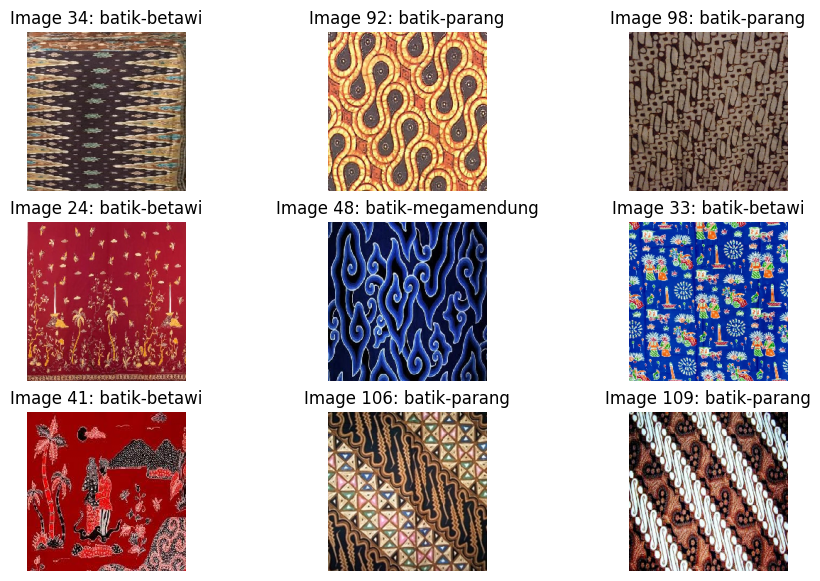

In [3]:
# Load Sample image for each classes
from matplotlib import pyplot as plt
import random

plt.figure(figsize=(11, 7))
for i in range(9):
    plt.subplot(3, 3, i+1)
    randomNum = random.randrange(0, len(images))
    plt.imshow(images[randomNum] ,cmap='gray')
    plt.axis('off')
    plt.title(f"Image {randomNum}: {class_names[classes[randomNum]]}")

plt.show()

In [4]:
from sklearn.model_selection import train_test_split

# Train Test Split
x_train, x_temp, y_train, y_temp = train_test_split(images, classes, test_size=0.2, random_state=42, shuffle=True, stratify=classes)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42, shuffle=True, stratify=y_temp)

print(f"Length of training data {len(y_train)}")
print(f"Length of testing data {len(y_test)}")
print(f"Length of validation data {len(y_val)}")

Length of training data 116
Length of testing data 15
Length of validation data 14


In [5]:
# Categorical Encoding
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

# Convert to numpy array
x_train = np.array(x_train)
x_val = np.array(x_val)
x_test = np.array(x_test)

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

model = Sequential([
    Conv2D(128, (3, 3), strides=(1, 1), padding='same', activation='relu', input_shape=(224, 224, 3)),
    Conv2D(256, (3, 3), strides=(1, 1), padding='same', activation='relu'),
    MaxPool2D(pool_size=(3, 3)),
    Conv2D(512, (3, 3), strides=(1, 1), padding='same', activation='relu'),
    Conv2D(1048, (3, 3), strides=(1, 1), padding='same', activation='relu'),
    MaxPool2D(pool_size=(3, 3)),
    Dropout(0.25),
    Flatten(),
    Dense(128, activation="relu"),
    Dense(64, activation="relu"),
    Dense(len(class_names), activation='softmax')
])

In [7]:
from tensorflow.keras.optimizers import Adam

optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 128)     3584      
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 256)     295168    
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 256)      0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 74, 74, 512)       1180160   
                                                                 
 conv2d_3 (Conv2D)           (None, 74, 74, 1048)      4830232   
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 24, 24, 1048)     0         
 2D)                                                    

In [8]:
# HYPERPARAMETERS
BATCH_SIZE = 12
EPOCHS = 100

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    horizontal_flip=True,
)

datagen.fit(x_train)
train_ds = datagen.flow(x_train, y_train, batch_size=BATCH_SIZE)

In [10]:
from tensorflow.keras.callbacks import EarlyStopping

steps_per_epoch = len(x_train) // BATCH_SIZE
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True) 
history = model.fit(train_ds,
                        validation_data=(x_val, y_val), 
                        epochs=EPOCHS,
                        steps_per_epoch=steps_per_epoch, 
                        callbacks=[early_stopping])

Epoch 1/100


NotFoundError: Graph execution error:

Detected at node 'sequential/conv2d_2/Relu' defined at (most recent call last):
    File "c:\Users\vince\anaconda3\envs\cuda_ai_310\lib\runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "c:\Users\vince\anaconda3\envs\cuda_ai_310\lib\runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "c:\Users\vince\anaconda3\envs\cuda_ai_310\lib\site-packages\ipykernel_launcher.py", line 18, in <module>
      app.launch_new_instance()
    File "c:\Users\vince\anaconda3\envs\cuda_ai_310\lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance
      app.start()
    File "c:\Users\vince\anaconda3\envs\cuda_ai_310\lib\site-packages\ipykernel\kernelapp.py", line 739, in start
      self.io_loop.start()
    File "c:\Users\vince\anaconda3\envs\cuda_ai_310\lib\site-packages\tornado\platform\asyncio.py", line 205, in start
      self.asyncio_loop.run_forever()
    File "c:\Users\vince\anaconda3\envs\cuda_ai_310\lib\asyncio\base_events.py", line 603, in run_forever
      self._run_once()
    File "c:\Users\vince\anaconda3\envs\cuda_ai_310\lib\asyncio\base_events.py", line 1909, in _run_once
      handle._run()
    File "c:\Users\vince\anaconda3\envs\cuda_ai_310\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "c:\Users\vince\anaconda3\envs\cuda_ai_310\lib\site-packages\ipykernel\kernelbase.py", line 545, in dispatch_queue
      await self.process_one()
    File "c:\Users\vince\anaconda3\envs\cuda_ai_310\lib\site-packages\ipykernel\kernelbase.py", line 534, in process_one
      await dispatch(*args)
    File "c:\Users\vince\anaconda3\envs\cuda_ai_310\lib\site-packages\ipykernel\kernelbase.py", line 437, in dispatch_shell
      await result
    File "c:\Users\vince\anaconda3\envs\cuda_ai_310\lib\site-packages\ipykernel\ipkernel.py", line 359, in execute_request
      await super().execute_request(stream, ident, parent)
    File "c:\Users\vince\anaconda3\envs\cuda_ai_310\lib\site-packages\ipykernel\kernelbase.py", line 778, in execute_request
      reply_content = await reply_content
    File "c:\Users\vince\anaconda3\envs\cuda_ai_310\lib\site-packages\ipykernel\ipkernel.py", line 446, in do_execute
      res = shell.run_cell(
    File "c:\Users\vince\anaconda3\envs\cuda_ai_310\lib\site-packages\ipykernel\zmqshell.py", line 549, in run_cell
      return super().run_cell(*args, **kwargs)
    File "c:\Users\vince\anaconda3\envs\cuda_ai_310\lib\site-packages\IPython\core\interactiveshell.py", line 3075, in run_cell
      result = self._run_cell(
    File "c:\Users\vince\anaconda3\envs\cuda_ai_310\lib\site-packages\IPython\core\interactiveshell.py", line 3130, in _run_cell
      result = runner(coro)
    File "c:\Users\vince\anaconda3\envs\cuda_ai_310\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "c:\Users\vince\anaconda3\envs\cuda_ai_310\lib\site-packages\IPython\core\interactiveshell.py", line 3334, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "c:\Users\vince\anaconda3\envs\cuda_ai_310\lib\site-packages\IPython\core\interactiveshell.py", line 3517, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "c:\Users\vince\anaconda3\envs\cuda_ai_310\lib\site-packages\IPython\core\interactiveshell.py", line 3577, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\vince\AppData\Local\Temp\ipykernel_14576\3983074637.py", line 5, in <module>
      history = model.fit(train_ds,
    File "c:\Users\vince\anaconda3\envs\cuda_ai_310\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\vince\anaconda3\envs\cuda_ai_310\lib\site-packages\keras\engine\training.py", line 1564, in fit
      tmp_logs = self.train_function(iterator)
    File "c:\Users\vince\anaconda3\envs\cuda_ai_310\lib\site-packages\keras\engine\training.py", line 1160, in train_function
      return step_function(self, iterator)
    File "c:\Users\vince\anaconda3\envs\cuda_ai_310\lib\site-packages\keras\engine\training.py", line 1146, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\vince\anaconda3\envs\cuda_ai_310\lib\site-packages\keras\engine\training.py", line 1135, in run_step
      outputs = model.train_step(data)
    File "c:\Users\vince\anaconda3\envs\cuda_ai_310\lib\site-packages\keras\engine\training.py", line 993, in train_step
      y_pred = self(x, training=True)
    File "c:\Users\vince\anaconda3\envs\cuda_ai_310\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\vince\anaconda3\envs\cuda_ai_310\lib\site-packages\keras\engine\training.py", line 557, in __call__
      return super().__call__(*args, **kwargs)
    File "c:\Users\vince\anaconda3\envs\cuda_ai_310\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\vince\anaconda3\envs\cuda_ai_310\lib\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "c:\Users\vince\anaconda3\envs\cuda_ai_310\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\vince\anaconda3\envs\cuda_ai_310\lib\site-packages\keras\engine\sequential.py", line 410, in call
      return super().call(inputs, training=training, mask=mask)
    File "c:\Users\vince\anaconda3\envs\cuda_ai_310\lib\site-packages\keras\engine\functional.py", line 510, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "c:\Users\vince\anaconda3\envs\cuda_ai_310\lib\site-packages\keras\engine\functional.py", line 667, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "c:\Users\vince\anaconda3\envs\cuda_ai_310\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\vince\anaconda3\envs\cuda_ai_310\lib\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "c:\Users\vince\anaconda3\envs\cuda_ai_310\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\vince\anaconda3\envs\cuda_ai_310\lib\site-packages\keras\layers\convolutional\base_conv.py", line 314, in call
      return self.activation(outputs)
    File "c:\Users\vince\anaconda3\envs\cuda_ai_310\lib\site-packages\keras\activations.py", line 317, in relu
      return backend.relu(
    File "c:\Users\vince\anaconda3\envs\cuda_ai_310\lib\site-packages\keras\backend.py", line 5366, in relu
      x = tf.nn.relu(x)
Node: 'sequential/conv2d_2/Relu'
No algorithm worked!  Error messages:
  Profiling failure on CUDNN engine 1#TC: RESOURCE_EXHAUSTED: Out of memory while trying to allocate 16812160 bytes.
  Profiling failure on CUDNN engine 1: RESOURCE_EXHAUSTED: Out of memory while trying to allocate 16812160 bytes.
  Profiling failure on CUDNN engine 0#TC: RESOURCE_EXHAUSTED: Out of memory while trying to allocate 16777216 bytes.
  Profiling failure on CUDNN engine 0: RESOURCE_EXHAUSTED: Out of memory while trying to allocate 16777216 bytes.
  Profiling failure on CUDNN engine 2#TC: RESOURCE_EXHAUSTED: Out of memory while trying to allocate 622379008 bytes.
  Profiling failure on CUDNN engine 2: RESOURCE_EXHAUSTED: Out of memory while trying to allocate 622379008 bytes.
  Profiling failure on CUDNN engine 6#TC: RESOURCE_EXHAUSTED: Out of memory while trying to allocate 29888512 bytes.
  Profiling failure on CUDNN engine 6: RESOURCE_EXHAUSTED: Out of memory while trying to allocate 29888512 bytes.
  Profiling failure on CUDNN engine 5#TC: RESOURCE_EXHAUSTED: Out of memory while trying to allocate 667418624 bytes.
  Profiling failure on CUDNN engine 5: RESOURCE_EXHAUSTED: Out of memory while trying to allocate 667418624 bytes.
  Profiling failure on CUDNN engine 7#TC: RESOURCE_EXHAUSTED: Out of memory while trying to allocate 674430976 bytes.
  Profiling failure on CUDNN engine 7: RESOURCE_EXHAUSTED: Out of memory while trying to allocate 674430976 bytes.
	 [[{{node sequential/conv2d_2/Relu}}]] [Op:__inference_train_function_1141]

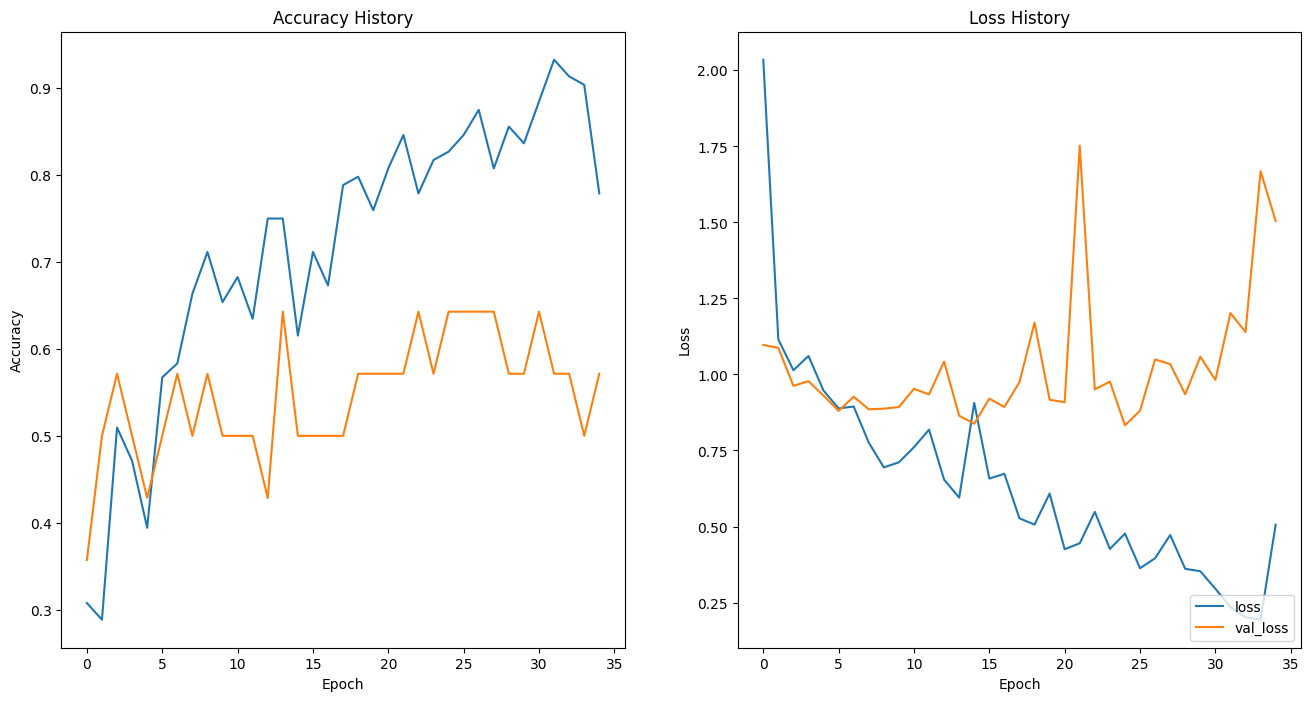

In [25]:
from matplotlib import pyplot as plt

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title("Accuracy History")

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title("Loss History")

plt.legend(loc='lower right')
plt.show()

In [39]:
# Evaluate Model
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")

1/1 [==============================] - 0s 383ms/step - loss: 0.3150 - accuracy: 0.9333
Loss: 0.31495681405067444
Accuracy: 0.9333333373069763


1/1 [==============================] - 0s 23ms/step


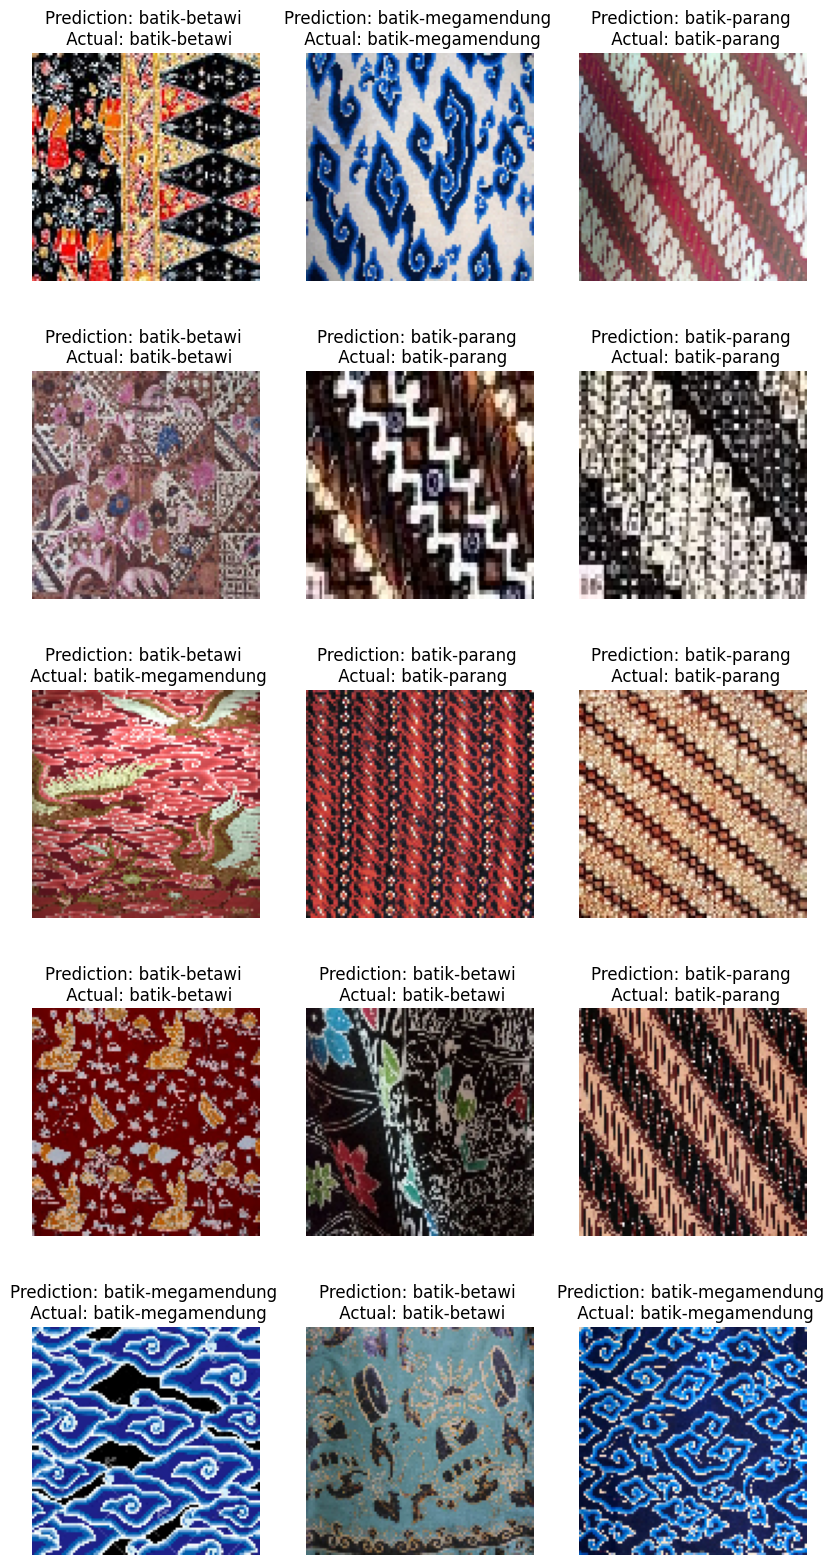

In [38]:
# Inference Prediction
plt.figure(figsize=(10, 20))
for i in range(15):
    plt.subplot(5, 3, i+1)
    prediction = model.predict(x_test[i].reshape(1, 100, 100, 3))
    plt.imshow(x_test[i])
    plt.axis('off')
    plt.title(f"Prediction: {class_names[np.argmax(prediction)]} \n Actual: {class_names[np.argmax(y_test[i])]}")

In [35]:
model.save("models/DCNN_Scratch-v3.h5")

In [40]:
from sklearn.metrics import classification_report

y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(y_test, axis=1)

print(classification_report(y_test, y_pred, target_names=class_names.values()))

1/1 [==============================] - 0s 21ms/step
                   precision    recall  f1-score   support

     batik-betawi       0.83      1.00      0.91         5
batik-megamendung       1.00      0.75      0.86         4
     batik-parang       1.00      1.00      1.00         6

         accuracy                           0.93        15
        macro avg       0.94      0.92      0.92        15
     weighted avg       0.94      0.93      0.93        15



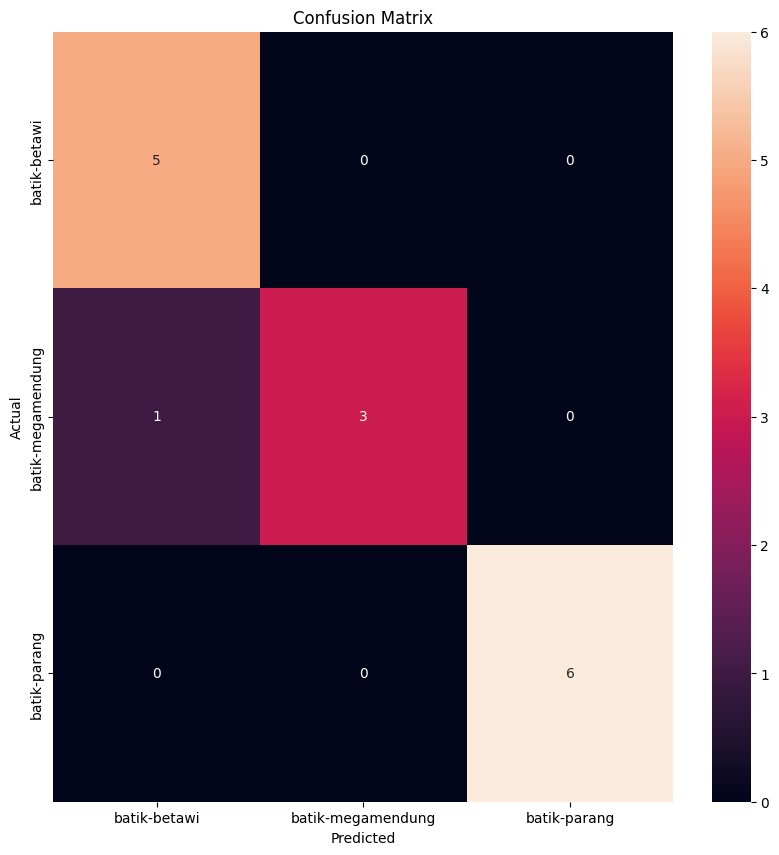

In [42]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(10, 10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', xticklabels=class_names.values(), yticklabels=class_names.values())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()